# **1. Data Exploration and Preprocessing**

In [10]:
import nltk # Natural Language Toolkit
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
import pandas as pd
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS
import seaborn as sns
import matplotlib.pyplot as plt
import re # Regular Expression
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [12]:
# Load the dataset
df = pd.read_csv('/content/blogs_categories.csv')

In [13]:
df

,Unnamed: 0,Data,Labels
0,0,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:49...,alt.atheism
1,1,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:51...,alt.atheism
2,2,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,alt.atheism
3,3,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:51...,alt.atheism
4,4,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:51...,alt.atheism
...,...,...,...
19992,19992,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:54...,talk.religion.misc
19993,19993,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:54...,talk.religion.misc
19994,19994,Xref: cantaloupe.srv.cs.cmu.edu talk.religion....,talk.religion.misc
19995,19995,Xref: cantaloupe.srv.cs.cmu.edu talk.religion....,talk.religion.misc


In [14]:
#Explore the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19997 entries, 0 to 19996
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  19997 non-null  int64 
 1   Data        19997 non-null  object
 2   Labels      19997 non-null  object
dtypes: int64(1), object(2)
memory usage: 468.8+ KB


In [15]:
# Check for any missing values
df.isnull().sum()

Unnamed: 0    0
Data          0
Labels        0
dtype: int64

In [16]:
# Display the distribution of the categories
df['Labels'].value_counts()

Labels
alt.atheism                 1000
comp.graphics               1000
talk.politics.misc          1000
talk.politics.mideast       1000
talk.politics.guns          1000
sci.space                   1000
sci.med                     1000
sci.electronics             1000
sci.crypt                   1000
rec.sport.hockey            1000
rec.sport.baseball          1000
rec.motorcycles             1000
rec.autos                   1000
misc.forsale                1000
comp.windows.x              1000
comp.sys.mac.hardware       1000
comp.sys.ibm.pc.hardware    1000
comp.os.ms-windows.misc     1000
talk.religion.misc          1000
soc.religion.christian       997
Name: count, dtype: int64

In [17]:
#preprocess the data
import string
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer

nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [21]:
# Function to preprocess the text
def preprocess_text(text):
    # Convert text to lowercase
    text = text.lower()
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Tokenize text
    tokens = text.split()
    # Remove stopwords
    tokens = [word for word in tokens if word not in stopwords.words('english')]
    return ' '.join(tokens)

In [22]:
# Apply the preprocessing function to the Data column
df['Data'] = df['Data'].apply(preprocess_text)


In [23]:
df.head()

,Unnamed: 0,Data,Labels
0,0,xref cantaloupesrvcscmuedu altatheism49960 alt...,alt.atheism
1,1,xref cantaloupesrvcscmuedu altatheism51060 alt...,alt.atheism
2,2,newsgroups altatheism path cantaloupesrvcscmue...,alt.atheism
3,3,xref cantaloupesrvcscmuedu altatheism51120 alt...,alt.atheism
4,4,xref cantaloupesrvcscmuedu altatheism51121 soc...,alt.atheism


In [25]:
#Feature extraction using TF-IDF
# Initialize the TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000)

In [26]:
# Fit and transform the Data column
X = tfidf_vectorizer.fit_transform(df['Data'])


In [27]:
# Convert Labels to numerical format
from sklearn.preprocessing import LabelEncoder


In [28]:
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df['Labels'])

# 2. Naive Bayes Model for Text Classification

Split the data into training and test sets

In [30]:
# Split the data into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [33]:
#Implement and train the Naive Bayes classifier
from sklearn.naive_bayes import MultinomialNB

# Initialize the Naive Bayes classifier
nb_classifier = MultinomialNB()

In [34]:
# Train the classifier on the training set
nb_classifier.fit(X_train, y_train)

MultinomialNB()

In [35]:
# Make predictions on the test set
y_pred = nb_classifier.predict(X_test)

# 3. Sentiment Analysis

In [36]:
#Perform sentiment analysis
from textblob import TextBlob

# Function to get sentiment
def get_sentiment(text):
    analysis = TextBlob(text)
    # Classify sentiment as positive, negative, or neutral
    if analysis.sentiment.polarity > 0:
        return 'positive'
    elif analysis.sentiment.polarity < 0:
        return 'negative'
    else:
        return 'neutral'

In [37]:
# Apply the function to the Data column
df['Sentiment'] = df['Data'].apply(get_sentiment)


In [38]:
# Display the sentiment distribution
df['Sentiment'].value_counts()

Sentiment
positive    14258
negative     5721
neutral        18
Name: count, dtype: int64

# 4.Evaluation

In [39]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')


In [40]:
# Print the evaluation metrics
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1-score: {f1}')

Accuracy: 0.87525
Precision: 0.8749084984480978
Recall: 0.87525
F1-score: 0.8731641027765689


<Axes: xlabel='Labels'>

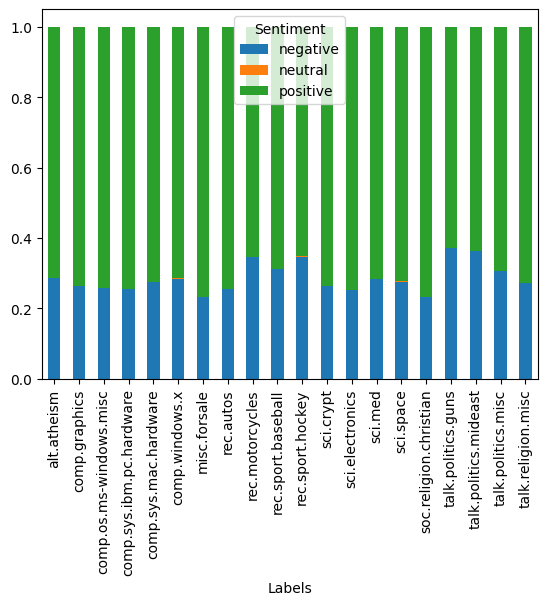

In [41]:
#Analyze sentiment distribution across categories
# Display the sentiment distribution across categories
sentiment_distribution = df.groupby('Labels')['Sentiment'].value_counts(normalize=True).unstack()
sentiment_distribution.plot(kind='bar', stacked=True)
